In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm as cm

In [11]:
name="after_Al"

In [12]:
xlim=[-100,1200]
ylim=[-100,1200]
width=100#100とか10とか50

In [13]:
DATA_DIR = "../data/model data/"
CACHE_DIR = "../data/cache/"
IMAGE_DIR = "../data/images/"
INVERSE_DIR = "../data/Inverse analysis/"
EXCEL_DIR = "../data/excel/"
PKL_DIR = "../data/pkl/"

In [14]:
plt.rcParams["font.family"] = "Arial"   # 使用するフォント
plt.rcParams["font.size"] = 14

In [15]:
Birth=open(f'{CACHE_DIR}{name}_b_pd1.txt','r')
Death=open(f'{CACHE_DIR}{name}_d_pd1.txt','r')
B,D=[],[]
while True:
    B_datalist = Birth.readline()
    if "#" in B_datalist:
        continue
    if B_datalist=='':
        break
    A=float(list(map(str,B_datalist.split()))[0])
    B.append(A)
Birth.close()
while True:
    D_datalist = Death.readline()
    if "#" in D_datalist:
        continue
    if D_datalist=='':
        break
    A=float(list(map(str,D_datalist.split()))[0])
    D.append(A)
Death.close()
L=len(B)
l=len(D)
if L!=l:
    print("Num error")
BD = open(f'{CACHE_DIR}{name}_birth_death_pair.txt', 'w')
for i in range(0,L):
    BD.write(str(B[i]))
    BD.write(" ")
    BD.write(str(D[i]))
    BD.write('\n')
BD.close()

c:\Users\vvho\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


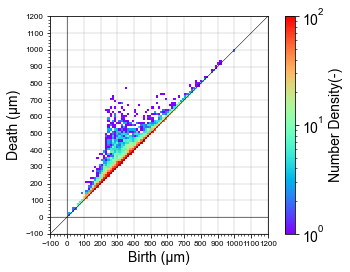

In [16]:
#グラフ
x=B
y=D
fig = plt.figure()
ax = fig.add_subplot(111)
H = ax.hist2d(x,y, bins=[np.linspace(xlim[0],xlim[1],width),np.linspace(ylim[0],ylim[1],width)], norm=matplotlib.colors.LogNorm(), cmap=cm.rainbow,vmin=10**0,vmax=10**2)

plt.xticks([i for i in range(xlim[0],xlim[1]+width,width)],fontsize=8)
plt.yticks([i for i in range(ylim[0],ylim[1]+width,width)],fontsize=8)
plt.minorticks_on()
plt.grid(which="major", color="gray", linestyle="solid",linewidth=0.25)
plt.axvline(x=0, ymin=-10, ymax=120,linewidth=0.5,c='black')
plt.axhline(y=0, xmin=-10, xmax=120,linewidth=0.5,c='black')
plt.plot(xlim, ylim,color="black",linewidth=0.5)
fig.colorbar(H[3],ax=ax).set_label('Number Density(-)')
ax.set_xlabel('Birth (μm)')
ax.set_ylabel('Death (μm)')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
ax.set_aspect(aspect)
plt.savefig(f'{IMAGE_DIR}{name}_pd1.png',dpi=500)
plt.show()
